# Data Analysis and Machine Learning Report

## Overview
The dataset was loaded from the file part_i.csv and analyzed using Pandas (2.2.3) in a Jupyter Notebook environment.

## First Look at the Data
The head() function was used to display the first few rows, providing an initial understanding of the dataset's structure and content.

## Dataset Information
The info() function revealed key details about the dataset, including the number of entries, column names, data types, and memory usage. This step helps identify categorical, numerical, and potential missing data.

## Missing Data Analysis
A check for missing values was performed using isnull().sum().sum(). The total count of missing values in the dataset was displayed, helping assess data completeness.



In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv("part_i.csv")
# Display the first few rows of the dataset
print(df.head())
# Show dataset information
print(df.info())
# Check for missing values in the dataset
print("Total number of missing data in the dataset: "+ str(df.isnull().sum().sum()))

   AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  7805    437.915    209.8215     48.0221        0.9735   99.6877    0.9775   
1  7503    340.757    138.3361     69.8417        0.8632   97.7400    0.9660   
2  5124    314.617    141.9803     46.5784        0.9447   80.7718    0.9721   
3  7990    437.085    201.4386     51.2245        0.9671  100.8622    0.9659   
4  7433    342.893    140.3350     68.3927        0.8732   97.2830    0.9831   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4L  ALLdaub4a  ALLdaub4b  \
0         7985  0.3547        4.3693  ...   113.9924    65.0610    59.5989   
1         7767  0.6637        1.9807  ...   105.7055    64.3685    62.2084   
2         5271  0.4760        3.0482  ...   109.7155    62.6423    58.7439   
3         8272  0.6274        3.9325  ...   116.5405    64.9069    60.2562   
4         7561  0.6006        2.0519  ...   107.7502    64.7071    61.3549   

   ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  

## Data Visualization
To understand the distribution of the target variable, a count plot was generated using Seaborn. The plot displays the frequency of different rice types, aiding in exploratory data analysis.(matplotlib version is 3.9.4 , seaborn version is 0.13.2 )

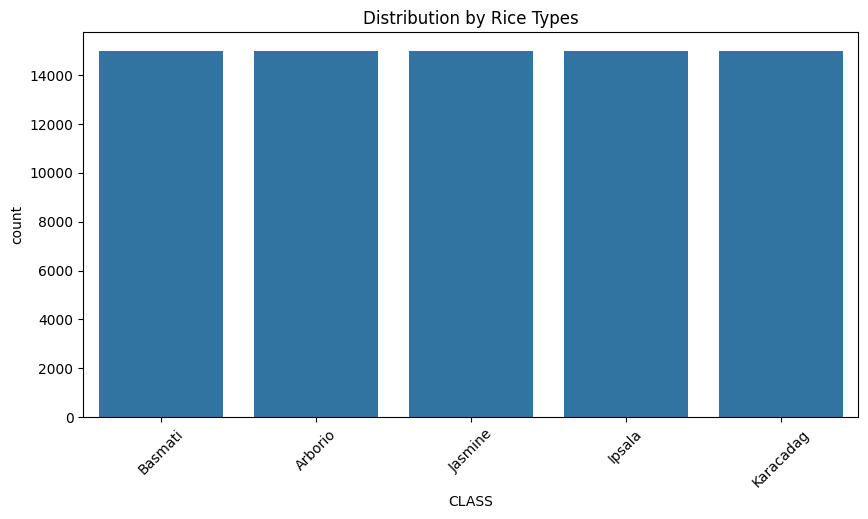

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a figure with a specific size (width=10 inches, height=5 inches)
plt.figure(figsize=(10, 5))
# Visualize the distribution of the target variable "CLASS" in the DataFrame `df`
# "sns.countplot" creates a bar plot showing the count of each unique value in the "CLASS" column
# The "order" parameter ensures the bars are ordered by the frequency of each class (most frequent first)
sns.countplot(x=df["CLASS"], order=df["CLASS"].value_counts().index)
# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation = 45)
# Add a title to the plot
plt.title("Distribution by Rice Types")
# Display the plot
plt.show()

## Data Transformation
The categorical target variable CLASS was transformed using LabelEncoder from scikit-learn. A mapping of class labels to numerical values was generated to facilitate machine learning applications.(sklearn version is 1.6.1)

In [3]:
# The LabelEncoder class is imported from the sklearn.preprocessing module.
# LabelEncoder is used to convert categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder
# An instance of LabelEncoder is created and assigned to the variable `le`.
le = LabelEncoder()
# The "CLASS" column in the DataFrame `df` is transformed into numerical values.
# The fit_transform method is used to both fit the encoder to the data and transform the labels.
df["CLASS"] = le.fit_transform(df["CLASS"])
# A mapping between the original class labels and their corresponding numerical values is created.
# The "classes_" attribute of the LabelEncoder contains the original class labels.
# The "transform" method is used to convert these labels into their numerical equivalents.
# A dictionary is constructed using "zip" to pair the original labels with their numerical values.
class_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
print("Class Transformation Map:", class_mapping)

Class Transformation Map: {'Arborio': np.int64(0), 'Basmati': np.int64(1), 'Ipsala': np.int64(2), 'Jasmine': np.int64(3), 'Karacadag': np.int64(4)}


Features were standardized using StandardScaler to ensure that all numerical variables have a mean of zero and a standard deviation of one, improving the performance of machine learning models.(numpy version is 2.0.2)

In [4]:
from sklearn.preprocessing import StandardScaler # For standardizing features
import numpy as np # For numerical operations
# Separate features (X) and target (y) from the DataFrame
X = df.drop(columns=["CLASS"]) 
y = df["CLASS"]
scaler = StandardScaler()
# Fit the scaler to the features and transform them into standardized values
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.18408554  0.84629572  1.31692147 ...  0.60485415  0.47182932
   1.20834304]
 [-0.2809056  -0.52994742 -0.64369033 ... -0.96716522 -0.90494576
  -1.32313361]
 [-1.04360398 -0.90022054 -0.54374178 ... -0.44474907 -0.26641063
   0.54765546]
 ...
 [-0.25654029 -0.55065665 -0.69919109 ... -0.93376876 -0.86251818
  -1.04494936]
 [ 2.17838792  1.57702562  1.07356671 ...  1.31333633  1.36705133
   0.5963377 ]
 [ 1.45929062  1.05480454  0.65024039 ...  1.77134501  1.78920579
   0.96029542]]


## Data Splitting
The dataset was split into training and test sets using train_test_split with an 80-20 ratio. This ensures that the model is trained on a majority of the data while preserving a separate set for evaluation.

In [5]:
from sklearn.model_selection import train_test_split
# Split the scaled features (X_scaled) and target (y) into training and testing sets
# test_size=0.2: 20% of the data is reserved for testing
# random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Train dataset size: ", X_train.shape)
print("Test dataset size: ", X_test.shape)


Train dataset size:  (60000, 106)
Test dataset size:  (15000, 106)


## Handling Missing Data
A SimpleImputer with the mean strategy was applied to fill in missing values in the dataset. This ensures that all features have valid numerical values before feeding them into the model.

## k-Nearest Neighbors  Model Selection

- The k-Nearest Neighbors algorithm predicts the label of a data point by finding the majority label among its k closest data points in the training set.

- A kNN classifier was trained for different values of k (from 1 to 20) to determine the best parameter for classification.

- Error rates were calculated based on the accuracy of each model.

- The best k value was selected as the one with the lowest error rate.

- A plot of error rates against different k values was generated to visualize the performance trend.




The best k value for kNN is : 3


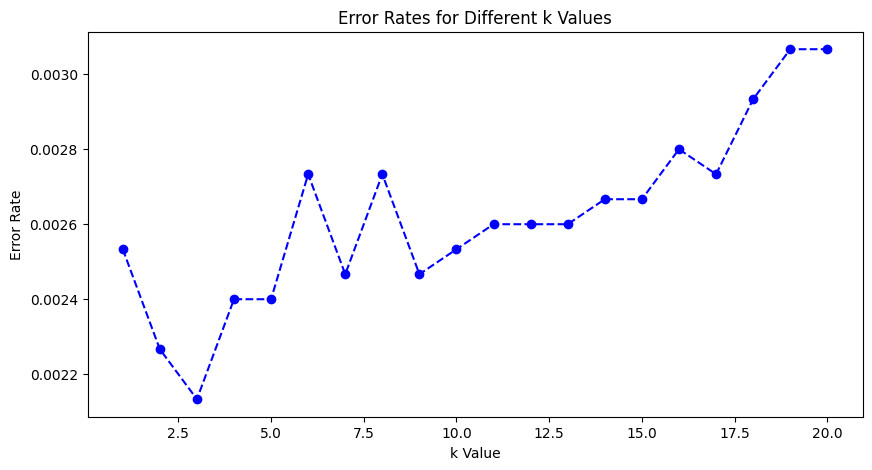

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
error_rates = [] # Initialize a list to store error rates for different k values
imputer = SimpleImputer(strategy="mean")  # Initialize a SimpleImputer to handle missing values by replacing them with the mean
# Impute missing values in the training, scaled, and testing datasets
X_train = imputer.fit_transform(X_train)
X_scaled = imputer.fit_transform(X_scaled) # will be used at the k-fold cross validation
X_test = imputer.transform(X_test)
# Iterate over k values from 1 to 20 to find the optimal k for kNN
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k) # Initialize kNN with current k
    knn.fit(X_train, y_train) # Train the model on the training data
    y_pred = knn.predict(X_test) # Predict on the test data
    error = 1 - accuracy_score(y_test, y_pred) # Calculate error rate
    error_rates.append(error) # Store the error rate
# Determine the best k value (the one with the lowest error rate)
best_k = np.argmin(error_rates) + 1 # Add 1 because k starts from 1, not 0
print("The best k value for kNN is : " + str(best_k))
# Plot the error rates for different k values
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker= "o", linestyle= "dashed", color= "b")
plt.xlabel("k Value")
plt.ylabel("Error Rate")
plt.title("Error Rates for Different k Values")
plt.show()

## Model Evaluation with Confusion Matrix

- A confusion matrix was generated to evaluate the performance of the kNN, Weighted kNN, Naive Bayes, Random Forest, Support Vector Machine models.

- The confusion matrix provides insights into the classification accuracy for each rice type: Arborio, Basmati, Ipsala, Jasmine, and Karacadag.

- A visual representation of the confusion matrix was created using ConfusionMatrixDisplay to analyze model predictions effectively

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def CreateDisplayConfusionMatrix(y_test,y_pred):
     # Compute the confusion matrix using true labels (y_test) and predicted labels (y_pred)
    cm = confusion_matrix(y_test,y_pred)
    # Create a ConfusionMatrixDisplay object with the computed confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Arborio","Basmati","Ipsala","Jasmine","Karacadag"])
    disp.plot()

## Cross-Validation and Final Model Performance

- The final kNN model was trained using the best k value and evaluated on the test set.

- Accuracy, precision, recall and f1-score scores were computed to assess classification performance.

- k-Fold Cross Validation splits the dataset into k subsets and determines the 1 subset to be test data and other k -1 to be train data. Iterates over k   times.  

- k-Fold Cross-Validation (with 5 splits) was performed to ensure robustness in model evaluation.

- The cross-validation scores and their average accuracy were reported to validate model generalization.

kNN Accuracy: 0.9978666666666667
kNN Precision: 0.9978715951556512
kNN Recall: 0.9978666666666667
kNN F1-Score: 0.9978677682961133
Cross-Validation Scores: [0.99786667 0.9988     0.99753333 0.99806667 0.99773333]
Average Accuracy: 0.998


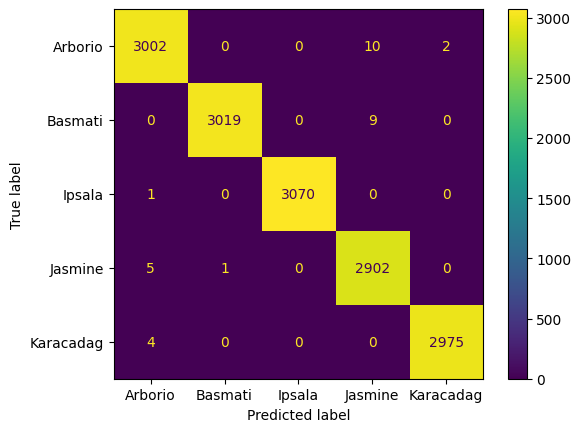

In [8]:
from sklearn.model_selection import cross_val_score, KFold

knn = KNeighborsClassifier(n_neighbors= best_k) # Initialize the kNN classifier with the best k value found earlier
knn.fit(X_train,y_train) # Train the kNN model on the training data
y_pred_knn = knn.predict(X_test) # Predict the labels for the test data using the trained kNN model

kf = KFold(n_splits = 5, shuffle = True, random_state = 42)# Initialize KFold for cross-validation with 5 splits, shuffling the data, and a fixed random state for reproducibility
scores = cross_val_score(knn, X_scaled, y, cv=kf)# Perform cross-validation on the scaled features (X_scaled) and target (y) using the kNN model

print(f"kNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(f"kNN Precision: {precision_score(y_test, y_pred_knn, average='weighted')}")
print(f"kNN Recall: {recall_score(y_test, y_pred_knn, average= 'weighted')}")
print(f"kNN F1-Score: {f1_score(y_test, y_pred_knn, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_test,y_pred_knn)

## Weighted k-Nearest Neighbors Model Selection

- Weighted k-Nearest Neighbors assigns higher importance to closer neighbors when making predictions, where each neighbor's vote is weighted by     the inverse of its distance to the query point.
 
- A Weighted kNN classifier was trained for different values of k (from 1 to 20) to determine the best parameter for classification.

- Error rates were calculated based on the accuracy of each model.

- The best k value was selected as the one with the lowest error rate.

- A plot of error rates against different k values was generated to visualize the performance trend.




The best k value for Weighted kNN is : 3


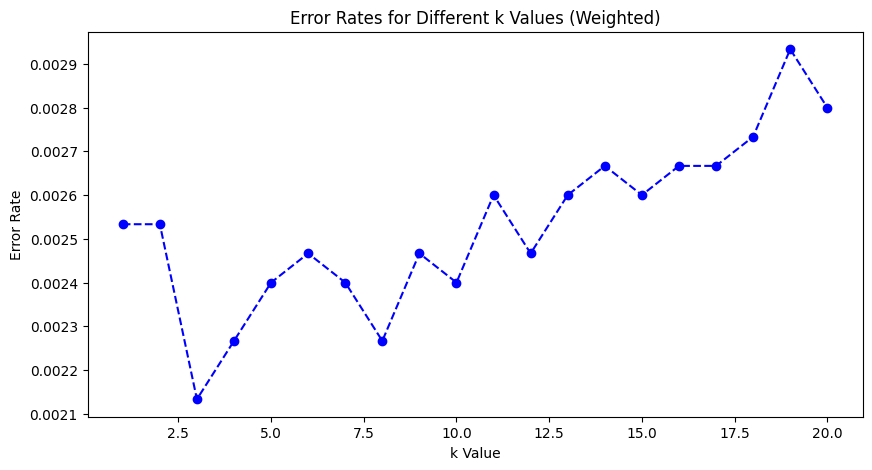

In [9]:
error_rates = []
for k in range(1, 21):
    weighted_knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    weighted_knn.fit(X_train, y_train) # train the model
    y_pred = weighted_knn.predict(X_test) # predict the labels
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

best_k = np.argmin(error_rates) + 1
print("The best k value for Weighted kNN is : " + str(best_k))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker= "o", linestyle= "dashed", color= "b")
plt.xlabel("k Value")
plt.ylabel("Error Rate")
plt.title("Error Rates for Different k Values (Weighted)")
plt.show()

## Cross-Validation and Final Model Performance

- The final Weighted kNN model was trained using the best k value and evaluated on the test set.

- Accuracy, precision, recall and f1-score scores were computed to assess classification performance.

- k-Fold Cross-Validation (with 5 splits) was performed to ensure robustness in model evaluation.

- The cross-validation scores and their average accuracy were reported to validate model generalization.

Weighted kNN Accuracy: 0.9978666666666667
Weighted kNN Precision: 0.9978715951556512
Weighted kNN Recall: 0.9978666666666667
Weighted kNN F1-Score: 0.9978677682961133
Cross-Validation Scores: [0.99786667 0.9988     0.99753333 0.99806667 0.99773333]
Average Accuracy: 0.998


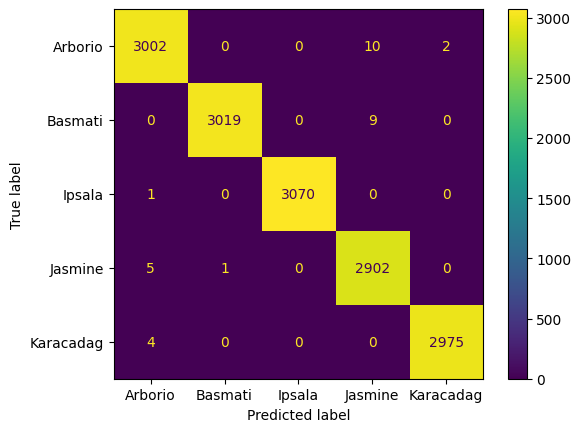

In [10]:
weighted_knn = KNeighborsClassifier(n_neighbors= best_k, weights="distance")
weighted_knn.fit(X_train,y_train) #train the model
y_pred_weighted_knn = weighted_knn.predict(X_test) # predict the labels
 
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(weighted_knn, X_scaled, y, cv=kf)

print(f"Weighted kNN Accuracy: {accuracy_score(y_test, y_pred_weighted_knn)}")
print(f"Weighted kNN Precision: {precision_score(y_test, y_pred_weighted_knn, average='weighted')}")
print(f"Weighted kNN Recall: {recall_score(y_test, y_pred_weighted_knn, average= 'weighted')}")
print(f"Weighted kNN F1-Score: {f1_score(y_test, y_pred_weighted_knn, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_test,y_pred_weighted_knn)

## Naive Bayes Classifier

- The Naive Bayes Classifier predicts the probability of a data point belonging to a class based on the Bayes Theorem, assuming that features are         independent of each other given the class.

- A Gaussian Naive Bayes classifier was trained and evaluated.

- The accuracy, precision, recall and f1-score scores of the Naive Bayes model were computed.

- k-Fold Cross-Validation was applied to validate the Naive Bayes model.

- A confusion matrix was generated to assess classification performance and compare results with the kNN model.

- Faster than kNN but lower accuracy, precision, recall and f1-score scores.

Naive Bayes Accuracy: 0.9906
Naive Bayes Precision: 0.9907185368363722
Naive Bayes Recall: 0.9906
Naive Bayes F1-Score: 0.9906139837298803
Cross-Validation Scores: [0.9906     0.99266667 0.9916     0.99313333 0.99006667]
Average Accuracy: 0.9916133333333332


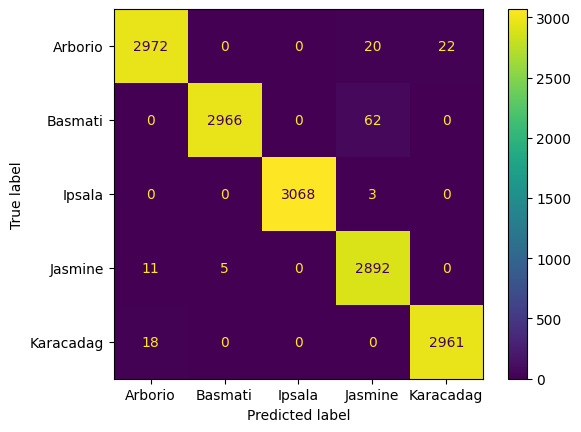

In [11]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train) # train the data
y_pred_nb = nb.predict(X_test) # predict the labels

scores = cross_val_score(nb, X_scaled, y, cv=kf)

print(f"Naive Bayes Accuracy: { accuracy_score(y_test, y_pred_nb)}")
print(f"Naive Bayes Precision: {precision_score(y_test, y_pred_nb, average='weighted')}")
print(f"Naive Bayes Recall: {recall_score(y_test, y_pred_nb, average= 'weighted')}")
print(f"Naive Bayes F1-Score: {f1_score(y_test, y_pred_nb, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_test,y_pred_nb)

## Random Forest Classifier

- The Random Forest Classifier combines multiple decision trees, each trained on random subsets of data and features, and makes predictions by           averaging or taking a majority vote of their outputs.

- A Random Forest classifier was trained and evaluated.

- The accuracy, precision, and recall scores of the Random Forest model were computed.

- k-Fold Cross-Validation was performed to validate the Random Forest model.

- A confusion matrix was generated to analyze classification performance and compare results with kNN and Naive Bayes.

- Compared to kNN and Naive Bayes, accuracy, precision, recall and f1-score scores ​​are higher but slower than them

Random Forest Accuracy: 0.9988
Random Forest Precision: 0.9988004322219621
Random Forest Recall: 0.9988
Random Forest F1-Score: 0.9987998998400061
Cross-Validation Scores: [0.9984     0.99886667 0.9986     0.9986     0.99886667]
Average Accuracy: 0.9986666666666666


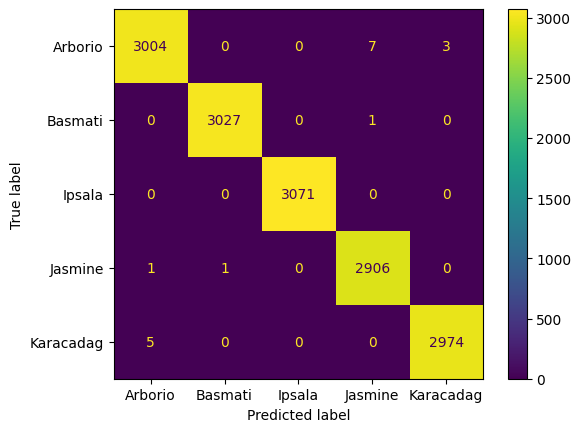

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train) # train the model
y_pred_rf = rf.predict(X_test) # predict the labels
   
scores = cross_val_score(rf, X_scaled, y, cv=kf)

print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Random Forest Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Random Forest Recall: { recall_score(y_test, y_pred_rf, average= 'weighted')}")
print(f"Random Forest F1-Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_test,y_pred_rf)

## Support Vector Machine Classifier

- The Support Vector Machine finds the optimal hyperplane that maximizes the margin between data points of different classes, effectively           separating them in the feature space.

- A Support Vector Machine classifier was trained and evaluated.

- The accuracy, precision, and recall scores of the SVM model were computed.

- k-Fold Cross-Validation was applied to validate the SVM model.

- A confusion matrix was generated to analyze classification performance and compare results with kNN, Naive Bayes, and Random Forest.

- Accuracy, precision, recall and f1-scores are very high like Random Forest but slow like Random Forest.

Support Vector Machine Accuracy: 0.999
Support Vector Machine Precision: 0.9990006986621343
Support Vector Machine Recall: 0.999
Support Vector Machine F1-Score: 0.9990000220584879
Cross-Validation Scores: [0.999      0.99926667 0.9992     0.999      0.99913333]
Average Accuracy: 0.9991199999999999


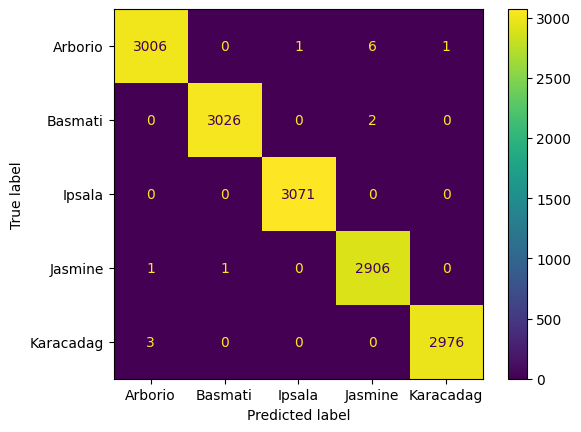

In [13]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train, y_train) #train the model
y_pred_svm = svm_model.predict(X_test) #predict the labels on test data

scores = cross_val_score(svm_model, X_scaled, y, cv=kf)

print(f"Support Vector Machine Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Support Vector Machine Precision: {precision_score(y_test, y_pred_svm, average='weighted')}")
print(f"Support Vector Machine Recall: {recall_score(y_test, y_pred_svm, average= 'weighted')}")
print(f"Support Vector Machine F1-Score: {f1_score(y_test, y_pred_svm, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_test,y_pred_svm)

## Image Dataset Processing
- Additionally, image data was loaded from the part_ii folder.
- The images were stored in separate folders for Arborio, Basmati, Ipsala, Jasmine, and Karacadag rice types.
- Each image was originally 250x250 in size but was resized to 32x32 to prevent memory errors.
- A total of {images_size} images were processed.
- Each image was assigned a label corresponding to its respective rice type.
- These images can be further utilized as additional features in machine learning models.(Pillow library version is 11.1.0)

In [14]:
import os # For interacting with the file system
import matplotlib.image as mpimg # For reading image files
from PIL import Image # For image manipulation
# Define the folders containing the images for each rice type
image_folders = ["part_ii/Arborio","part_ii/Basmati","part_ii/Ipsala","part_ii/Jasmine","part_ii/Karacadag"]
# Initialize lists to store images and their corresponding labels
images = []
labels = []
images_size = 0 # Initialize a counter to keep track of the total number of images processed
# Iterate through each folder
for folder in image_folders:
    image_files = os.listdir(folder)
    for img in image_files:
        image = mpimg.imread(os.path.join(folder,img))  # Read the image using matplotlib
        images.append(Image.fromarray(image).resize((32, 32))) #since image is 250*250 memory error is occurred so image is resized to 32*32
        labels.append(int(images_size / 15000))
        images_size += 1
print(f"total number of images loaded: {images_size}")

total number of images loaded: 75000


- The image list was converted into a NumPy array for efficient processing and compatibility with machine learning models.

In [15]:
images = np.array(images) #list is converted to numpy array

- Each 2D image matrix was flattened into a 1D feature vector, transforming image data into a structured format suitable for machine learning models.

In [16]:
#Each image converted from 2D matrix to 1D array to represent features
X_rgb = images.reshape(images.shape[0], -1)

- Images were converted to grayscale by computing the mean across the color channels.
- A binary thresholding operation was applied using a threshold value of 127, converting grayscale images into binary (black & white) representations.

In [17]:
from sklearn.preprocessing import Binarizer
gray_images = np.mean(images,axis = -1)
threshold = 127
binary_images = gray_images > threshold
X_binary = binary_images.reshape(binary_images.shape[0], -1 )

- The RGB and binary feature vectors were horizontally stacked to form a combined feature matrix (X_rgb_binary), incorporating both color and binary image information for enhanced model performance

In [18]:
X_rgb_binary = np.hstack((X_rgb, X_binary))

- The combined feature matrix was then standardized using StandardScaler, ensuring that all features have a mean of zero and a standard deviation of one, improving the performance and stability of machine learning models.

In [19]:
X_rgb_binary = scaler.fit_transform(X_rgb_binary)

- The dataset was then split into training (80%) and test (20%) sets using train_test_split, ensuring that model evaluation is performed on unseen data.

In [20]:
X_rgb_train, X_rgb_test, y_rgb_train, y_rgb_test = train_test_split(X_rgb_binary, labels, test_size=0.2, random_state=42)

## kNN Model Selection
- A k-Nearest Neighbors classifier was trained on the image dataset using different values of k (from 1 to 9) to determine the optimal parameter for classification.

- Error rates were calculated based on the accuracy of each model, and the best k value was selected as the one with the lowest error rate.

- A plot of error rates for different k values was created to visualize performance trends.

The best k value for kNN is : 3


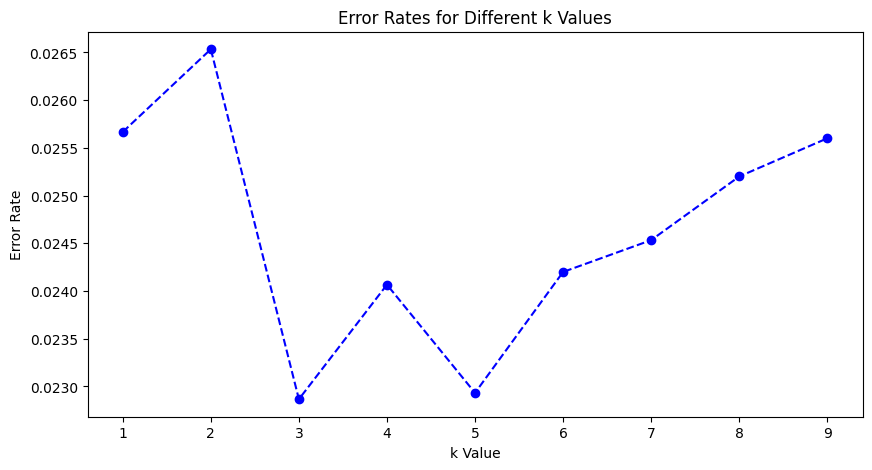

In [21]:
error_rates = []
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rgb_train, y_rgb_train) #train the model
    y_pred = knn.predict(X_rgb_test)# predict the labels on the test data
    error = 1 - accuracy_score(y_rgb_test, y_pred)
    error_rates.append(error)

best_k = np.argmin(error_rates) + 1
print("The best k value for kNN is : " + str(best_k))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), error_rates, marker= "o", linestyle= "dashed", color= "b")
plt.xlabel("k Value")
plt.ylabel("Error Rate")
plt.title("Error Rates for Different k Values")
plt.show()

- A k-Nearest Neighbors classifier was trained on the image dataset using the best k value, selected from the previous step.
- The classifier was evaluated using accuracy, precision, recall and f1-score scores on the test set.
- Cross-validation was performed to assess the model's generalization performance across multiple splits of the dataset.
- The confusion matrix was generated to visualize the model's classification performance.
- The evaluation results were printed, including the accuracy, precision, recall, f1-score, cross-validation scores, and average accuracy

kNN Accuracy: 0.9771333333333333
kNN Precision: 0.9772446656705694
kNN Recall: 0.9771333333333333
kNN F1-Score: 0.9771282739529005
Cross-Validation Scores: [0.97713333 0.9788     0.9774     0.97486667 0.97593333]
Average Accuracy: 0.9768266666666667


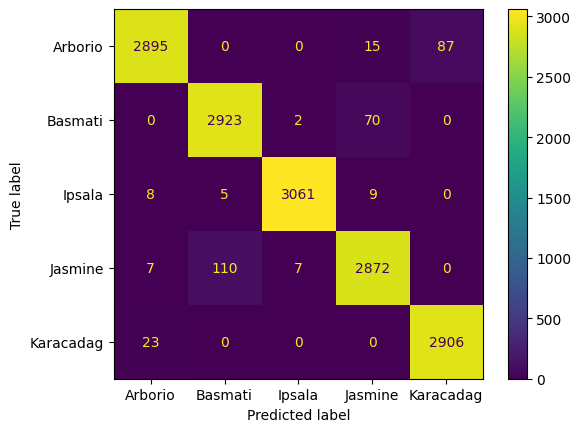

In [22]:
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(X_rgb_train, y_rgb_train) #train the model
y_pred_knn = knn.predict(X_rgb_test) # predict the labels on the test data

scores = cross_val_score(knn,X_rgb_binary, labels, cv=kf)

print(f"kNN Accuracy: {accuracy_score(y_rgb_test, y_pred_knn)}")
print(f"kNN Precision: {precision_score(y_rgb_test, y_pred_knn, average='weighted')}")
print(f"kNN Recall: {recall_score(y_rgb_test, y_pred_knn, average= 'weighted')}")
print(f"kNN F1-Score: {f1_score(y_rgb_test, y_pred_knn, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_rgb_test,y_pred_knn)

## Weighted kNN Model Selection
- A Weighted k-Nearest Neighbors classifier was trained on the image dataset using different values of k (from 1 to 9) to determine the optimal parameter for classification.

- Error rates were calculated based on the accuracy of each model, and the best k value was selected as the one with the lowest error rate.

- A plot of error rates for different k values was created to visualize performance trends.

The best k value for Weighted kNN is : 4


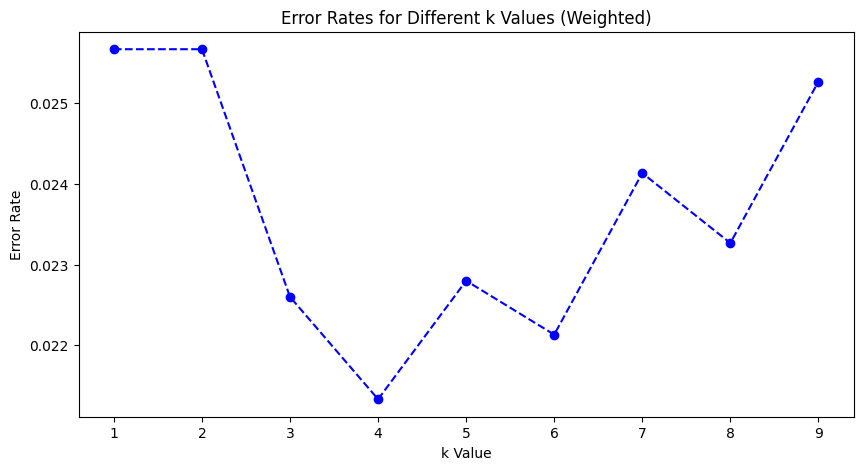

In [23]:
error_rates = []
for k in range(1, 10):
    weighted_knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    weighted_knn.fit(X_rgb_train, y_rgb_train) #train the model
    y_pred = weighted_knn.predict(X_rgb_test) # predict the labels on the test data
    error = 1 - accuracy_score(y_rgb_test, y_pred)
    error_rates.append(error)

best_k = np.argmin(error_rates) + 1
print("The best k value for Weighted kNN is : " + str(best_k))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), error_rates, marker= "o", linestyle= "dashed", color= "b")
plt.xlabel("k Value")
plt.ylabel("Error Rate")
plt.title("Error Rates for Different k Values (Weighted)")
plt.show()

- A Weighted k-Nearest Neighbors (Weighted kNN) classifier was trained on the image dataset using the best k value, selected from the previous step.
- The classifier was evaluated using accuracy, precision, recall and f1-score scores on the test set.
- Cross-validation was performed to assess the model's generalization performance across multiple splits of the dataset.
- The confusion matrix was generated to visualize the model's classification performance.
- The evaluation results were printed, including the accuracy, precision, recall, f1-score, cross-validation scores, and average accuracy

Weighted kNN Accuracy: 0.9786666666666667
Weighted kNN Precision: 0.9787829998055404
Weighted kNN Recall: 0.9786666666666667
Weighted kNN F1-Score: 0.9786647439242047
Cross-Validation Scores: [0.97866667 0.97973333 0.97833333 0.9756     0.97706667]
Average Accuracy: 0.9778800000000001


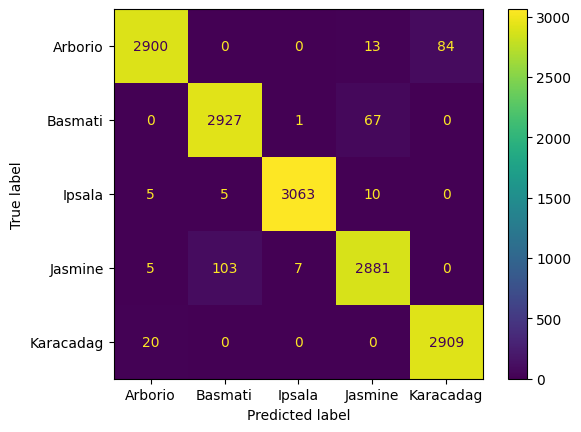

In [24]:
weighted_knn = KNeighborsClassifier(n_neighbors= best_k, weights="distance")
weighted_knn.fit(X_rgb_train, y_rgb_train) #train the model
y_pred_weighted_knn = weighted_knn.predict(X_rgb_test) #predict the labels on the test data

scores = cross_val_score(weighted_knn,X_rgb_binary, labels, cv=kf)

print(f"Weighted kNN Accuracy: {accuracy_score(y_rgb_test, y_pred_weighted_knn)}")
print(f"Weighted kNN Precision: {precision_score(y_rgb_test, y_pred_weighted_knn, average='weighted')}")
print(f"Weighted kNN Recall: {recall_score(y_rgb_test, y_pred_weighted_knn, average= 'weighted')}")
print(f"Weighted kNN F1-Score: {f1_score(y_rgb_test, y_pred_weighted_knn, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_rgb_test,y_pred_weighted_knn)

## Naive Bayes Classifier Evaluation

- The Naive Bayes model was trained on the image dataset using the X_rgb_train and y_rgb_train data.
- The model was evaluated using the test set, and accuracy, precision, recall and f1-score scores were calculated to assess its performance.
- Cross-validation was performed to evaluate the Naive Bayes model's robustness across different splits of the dataset.
- A confusion matrix was generated to visualize the classification results and compare with the kNN model's performance.
The evaluation results were printed, including the accuracy, precision, recall, f1-score, cross-validation scores, and average accuracy.
- Accuracy, precision, recall and f1-score scores are extremely low because features need to be independent of each other.

Naive Bayes Accuracy: 0.5578666666666666
Naive Bayes Precision: 0.62846895752184
Naive Bayes Recall: 0.5578666666666666
Naive Bayes F1-Score: 0.546426860928729
Cross-Validation Scores: [0.55786667 0.55013333 0.54426667 0.55226667 0.54113333]
Average Accuracy: 0.5491333333333334


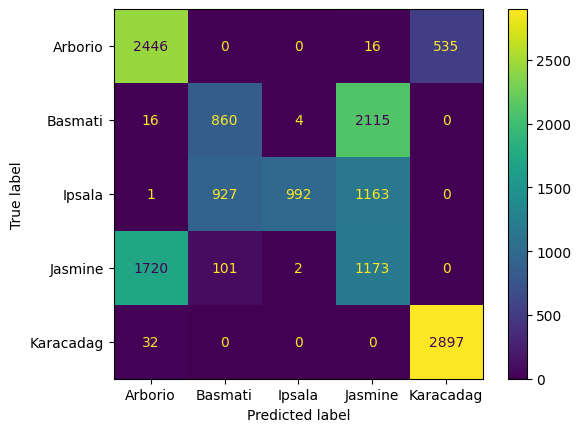

In [25]:
nb = GaussianNB()
nb.fit(X_rgb_train, y_rgb_train) #train the model
y_pred_nb = nb.predict(X_rgb_test) #predict the labels on the test data

scores = cross_val_score(nb, X_rgb_binary, labels, cv=kf)

print(f"Naive Bayes Accuracy: {accuracy_score(y_rgb_test, y_pred_nb)}")
print(f"Naive Bayes Precision: {precision_score(y_rgb_test, y_pred_nb, average='weighted')}")
print(f"Naive Bayes Recall: {recall_score(y_rgb_test, y_pred_nb, average='weighted')}")
print(f"Naive Bayes F1-Score: {f1_score(y_rgb_test, y_pred_nb, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_rgb_test,y_pred_nb)

## Support Vector Machine Classifier Evaluation
- After evaluating the kNN and Naive Bayes models, a Support Vector Machine (SVM) classifier was trained on the image dataset to compare its performance.
- The SVM model was trained using X_rgb_train and y_rgb_train, and predictions were made on the test set (y_pred_svm).
- Accuracy, precision, recall and f1-score scores were computed to evaluate the performance of the SVM model.
- Cross-validation was applied to ensure the robustness of the model across different data splits.
- A confusion matrix was generated to assess the model's classification performance and compare it with the kNN and Naive Bayes models.
- The evaluation results were printed, including the accuracy, precision, recall, f1-score, cross-validation scores, and average accuracy.
- Compared to kNN and Naive Bayes, accuracy, precision, recall and f1-score scores ​​are higher but slower than them

Support Vector Machine Accuracy: 0.9886
Support Vector Machine Precision: 0.9886018930540406
Support Vector Machine Recall: 0.9886
Support Vector Machine F1-Score: 0.9885904698876673
Cross-Validation Scores: [0.9886     0.99053333 0.98926667 0.9884     0.9896    ]
Average Accuracy: 0.9892799999999999


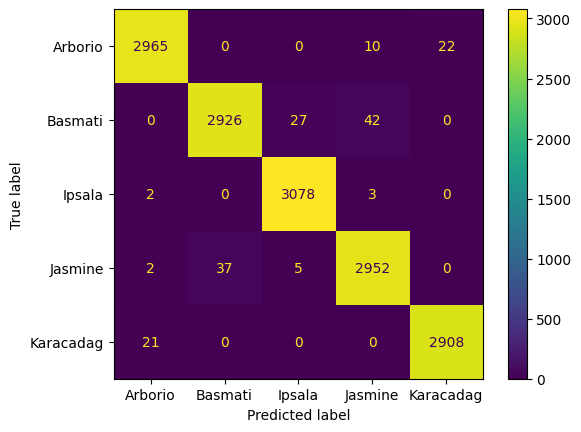

In [26]:
svm_model = SVC()
svm_model.fit(X_rgb_train,y_rgb_train) #train the model
y_pred_svm = svm_model.predict(X_rgb_test) #predict the labels on the test data

scores = cross_val_score(svm_model, X_rgb_binary, labels, cv=kf)

print(f"Support Vector Machine Accuracy: {accuracy_score(y_rgb_test, y_pred_svm)}")
print(f"Support Vector Machine Precision: {precision_score(y_rgb_test, y_pred_svm, average='weighted')}")
print(f"Support Vector Machine Recall: {recall_score(y_rgb_test, y_pred_svm, average='weighted')}")
print(f"Support Vector Machine F1-Score: {f1_score(y_rgb_test, y_pred_svm, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_rgb_test,y_pred_svm)

## Random Forest Classifier Evaluation
- The Random Forest model was trained using the image dataset (X_rgb_train, y_rgb_train) and predictions were made on the test set (y_pred_rf).
- Accuracy, precision, recall and f1-score scores were calculated to assess the performance of the Random Forest model.
- Cross-validation was performed to evaluate the model's performance across different data splits.
- A confusion matrix was generated to analyze classification results and compare them with the kNN, Naive Bayes, and SVM models.
- The evaluation results were printed, including the accuracy, precision, recall, f1-score, cross-validation scores, and average accuracy.
- The highest accuracy, precision, recall and f1- score scores. Slow but not as slow as Super Vector Machine 

Random Forest Accuracy: 0.9922666666666666
Random Forest Precision: 0.9922744671581406
Random Forest Recall: 0.9922666666666666
Random Forest F1-Score: 0.9922686868320578
Cross-Validation Scores: [0.99226667 0.99346667 0.99226667 0.99166667 0.99233333]
Average Accuracy: 0.9924


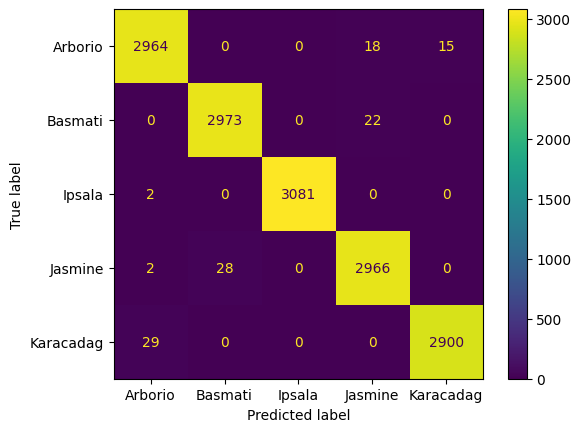

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_rgb_train,y_rgb_train) #train the model
y_pred_rf = rf.predict(X_rgb_test) #predict the labels on the test data

scores = cross_val_score(rf, X_rgb_binary, labels, cv=kf)

print(f"Random Forest Accuracy: {accuracy_score(y_rgb_test, y_pred_rf)}")
print(f"Random Forest Precision: {precision_score(y_rgb_test, y_pred_rf, average='weighted')}")
print(f"Random Forest Recall: {recall_score(y_rgb_test, y_pred_rf, average='weighted')}")
print(f"Random Forest F1-Score: {f1_score(y_rgb_test, y_pred_rf, average='weighted')}")
print(f"Cross-Validation Scores: {scores}")
print(f"Average Accuracy: {scores.mean()}")
CreateDisplayConfusionMatrix(y_rgb_test,y_pred_rf)

## Summary
- The dataset was successfully loaded and inspected.

- Column types and memory usage were identified.
- Missing data, if any, were quantified and handled using imputation.
- A visualization of the target variable distribution was created for better understanding.
- The categorical CLASS column was encoded into numerical values for further processing.
- Feature scaling was applied to standardize the dataset for machine learning models.
- The dataset was split into training and test sets for model evaluation.
- A kNN (k-Nearest Neighbors) model was trained and optimized by selecting the best k value. A confusion matrix was created to assess classification performance across different rice types.
- Cross-validation was performed to validate the kNN model's performance across different data splits.
- A Naive Bayes (NB) classifier was trained and evaluated, providing an alternative classification approach. Cross-validation was also used to ensure the robustness of the Naive Bayes model.
- A Random Forest (RF) classifier was trained and evaluated, offering another approach for classification. Cross-validation was performed to validate the model's performance.
- A Support Vector Machine (SVM) classifier was trained and evaluated, providing another powerful model for classification. Cross-validation was used to assess the model's generalization capability.
- Evaluation of models included accuracy, precision, recall, f1-score and cross-validation scores.
- For all models, a confusion matrix was created to assess classification performance and compare results.